<a href="https://colab.research.google.com/github/truptipatil04/Practice/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Libraries</h2>
AI-based chatbot for healthcare

In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [6]:
%%writefile content.json
 {
  "intents":
   [
    {
      "tag": "greeting",
      "input": [
              "Hi",
              "How are you",
              "Is anyone there?",
              "Hello",
              "Good day",
              "Whats up",
              "Hey",
              "greetings"
      ],
      "responses": [
              "Hello!",
              "Good to see you again!",
              "Hi there, how can I help?"
      ]
    },
    {
      "tag": "goodbye",
      "input": [
              "cya",
              "See you later",
              "Goodbye",
              "I am Leaving",
              "Have a Good day",
              "bye",
              "cao",
              "see ya"
      ],
      "responses": [
              "Sad to see you go :(",
              "Talk to you later",
              "Goodbye!"
      ]
    },
    {
      "tag": "programming",
      "input": [
              "What is progamming?",
              "What is coding?",
              "Tell me about programming",
              "Tell me about coding",
              "What is software development?"
      ],
      "responses": [
              "Programming, coding or software development, means writing computer code to automate tasks."
      ]
    },
    {
      "tag": "resource",
      "input": [
              "Where can I learn to code?",
              "Best way to learn to code",
              "How can I learn programming",
              "Good programming resources",
              "Can you recommend good coding resources?"
      ],
      "responses": [
              "Check out the NeuralNine YouTube channel and The Python Bible series (7 in 1)."
      ]
    }
  ]
}

Writing content.json


In [9]:
#import the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [12]:
#getting all the dataset
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']] = intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [13]:
#conveerting to dataframe
data = pd.DataFrame({"inputs":inputs, "tags":tags})

In [14]:
#printing the data
data

,inputs,tags
0,Hi,greeting
1,How are you,greeting
2,Is anyone there?,greeting
3,Hello,greeting
4,Good day,greeting
5,Whats up,greeting
6,Hey,greeting
7,greetings,greeting
8,cya,goodbye
9,See you later,goodbye


<h2>Pre-processing</h2>


In [15]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hi,greeting
1,how are you,greeting
2,is anyone there,greeting
3,hello,greeting
4,good day,greeting
5,whats up,greeting
6,hey,greeting
7,greetings,greeting
8,cya,goodbye
9,see you later,goodbye


In [16]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [17]:
input_shape = x_train.shape[1]
print(input_shape)

6


In [18]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length : ",output_length)

number of unique words :  44
output length :  4


<h2>Neural Network</h2>


In [19]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

In [20]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [21]:
#training the model
train = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.3912 - accuracy: 0.1923
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 1.3896 - accuracy: 0.1923
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1.3881 - accuracy: 0.1154
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 1.3866 - accuracy: 0.0769
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 1.3852 - accuracy: 0.0769
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 1.3838 - accuracy: 0.2308
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 1.3824 - accuracy: 0.3077
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 1.3810 - accuracy: 0.3846
Epoch 9/10
1/1 [==============================] - 0s 18ms/step - loss: 1.3796 - accuracy: 0.3846
Epoch 10/10
1/1 [==============================] - 0s 19ms/step - loss: 1.3782 - accuracy: 0.3846


<h2>Model Analysis</h2>


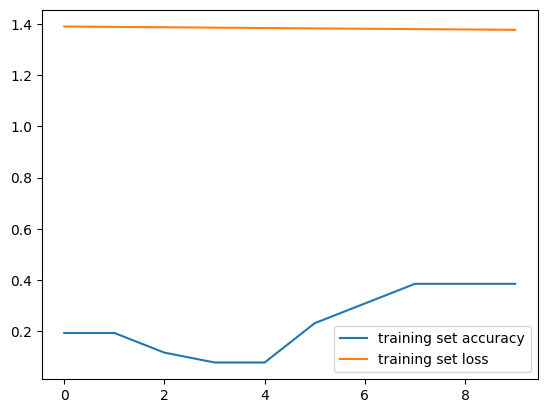

In [22]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

<h2>Testing</h2>


In [ ]:
#chatting
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuations and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Chatbot : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break